# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [3]:
cities

['saskylakh',
 'albany',
 'upernavik',
 'hilo',
 'torbay',
 'mayo',
 'butaritari',
 'sitka',
 'boueni',
 'abha',
 'wattegama',
 'ossora',
 'belushya guba',
 'davila',
 'rikitea',
 'constitucion',
 'oussouye',
 'verkhoyansk',
 'great bend',
 'punta arenas',
 'belfast',
 'atuona',
 'sovetskiy',
 'hobart',
 'ambilobe',
 'bowen',
 'normandin',
 'talara',
 'delcevo',
 'necochea',
 'namibe',
 'srednekolymsk',
 'attawapiskat',
 'kodinsk',
 'vaini',
 'port alfred',
 'carnarvon',
 'new norfolk',
 'vikulovo',
 'asau',
 'kaitangata',
 'zhigansk',
 'saint-avold',
 'esperance',
 'bredasdorp',
 'kadayanallur',
 'khatanga',
 'bandarbeyla',
 'champerico',
 'barrow',
 'tuktoyaktuk',
 'ushuaia',
 'entre rios',
 'bluff',
 'saldanha',
 'deputatskiy',
 'busselton',
 'kavieng',
 'nyrob',
 'avarua',
 'ust-tsilma',
 'mar del plata',
 'faanui',
 'ilulissat',
 'mocorito',
 'prainha',
 'laguna',
 'saint-philippe',
 'kodiak',
 'pec',
 'rongcheng',
 'kamenka',
 'kiama',
 'radovitskiy',
 'oil city',
 'tuatapere',
 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#test API call
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
query = base_url + cities[1] + "&appid=" + weather_api_key + "&units=imperial"
response = requests.get(query)
data = response.json()

print(response)
pprint(data)

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 42.65, 'lon': -73.75},
 'dt': 1569467666,
 'id': 5106834,
 'main': {'humidity': 67,
          'pressure': 1010,
          'temp': 54.99,
          'temp_max': 62.6,
          'temp_min': 50},
 'name': 'Albany',
 'sys': {'country': 'US',
         'id': 3273,
         'message': 0.0087,
         'sunrise': 1569408315,
         'sunset': 1569451694,
         'type': 1},
 'timezone': -14400,
 'visibility': 16093,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 160, 'speed': 4.7}}


In [5]:
# set lists for the dataframe
city2 = []
cloud = []
countries = []
dates = []
humid = []
lat = []
lng = []
max_temp = []
wind_speed = []


# set initial count quantities for organization
count_a = 0
set_a = 1

# define temperature units and url
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

print("Begin API Call to OpenWeather Database ")
print("---------------------------------------")

# loops for creating dataframe columns
for city in cities:
    try:
        query = base_url + city.replace(" ","+") + "&appid=" + weather_api_key + "&units=imperial"
        response = requests.get(query)
        data = response.json()
        cloud.append(data['clouds']['all'])
        countries.append(data['sys']['country'])
        dates.append(data['dt'])
        humid.append(data['main']['humidity'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        max_temp.append(data['main']['temp_max'])
        wind_speed.append(data['wind']['speed'])
        if count_a > 48:
            count_a = 1
            set_a += 1
            city2.append(city)
        else:
            count_a += 1
            city2.append(city)
        print(f"Processing Record {count_a} of Set {set_a} | {city}")
    except Exception:
        print("City not found. Skipping...")

print("------------------------------\nData Retrieval Complete\n------------------------------")

Begin API Call to OpenWeather Database 
---------------------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | torbay
Processing Record 6 of Set 1 | mayo
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | sitka
Processing Record 9 of Set 1 | boueni
Processing Record 10 of Set 1 | abha
Processing Record 11 of Set 1 | wattegama
Processing Record 12 of Set 1 | ossora
City not found. Skipping...
Processing Record 13 of Set 1 | davila
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | constitucion
Processing Record 16 of Set 1 | oussouye
Processing Record 17 of Set 1 | verkhoyansk
Processing Record 18 of Set 1 | great bend
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | belfast
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | sovetskiy
Processin

Processing Record 39 of Set 4 | nandyal
Processing Record 40 of Set 4 | auchi
Processing Record 41 of Set 4 | twante
Processing Record 42 of Set 4 | porto nacional
Processing Record 43 of Set 4 | coromandel
City not found. Skipping...
Processing Record 44 of Set 4 | lusambo
City not found. Skipping...
Processing Record 45 of Set 4 | piacabucu
City not found. Skipping...
City not found. Skipping...
Processing Record 46 of Set 4 | lewiston
Processing Record 47 of Set 4 | san cristobal
Processing Record 48 of Set 4 | mbandaka
Processing Record 49 of Set 4 | poum
Processing Record 1 of Set 5 | port macquarie
Processing Record 2 of Set 5 | severo-kurilsk
Processing Record 3 of Set 5 | kibala
Processing Record 4 of Set 5 | bobcaygeon
Processing Record 5 of Set 5 | college
Processing Record 6 of Set 5 | rojhan
Processing Record 7 of Set 5 | alice springs
Processing Record 8 of Set 5 | brasilia
Processing Record 9 of Set 5 | broome
Processing Record 10 of Set 5 | matadi
City not found. Skippin

Processing Record 27 of Set 8 | evensk
Processing Record 28 of Set 8 | soloneshnoye
Processing Record 29 of Set 8 | shetpe
Processing Record 30 of Set 8 | caruray
Processing Record 31 of Set 8 | tefe
Processing Record 32 of Set 8 | haines junction
Processing Record 33 of Set 8 | coquimbo
Processing Record 34 of Set 8 | kindu
Processing Record 35 of Set 8 | owando
Processing Record 36 of Set 8 | vite
Processing Record 37 of Set 8 | luderitz
Processing Record 38 of Set 8 | am timan
Processing Record 39 of Set 8 | suhbaatar
Processing Record 40 of Set 8 | tyler
Processing Record 41 of Set 8 | kyren
Processing Record 42 of Set 8 | puerto colombia
Processing Record 43 of Set 8 | doha
Processing Record 44 of Set 8 | tatarsk
Processing Record 45 of Set 8 | maputo
Processing Record 46 of Set 8 | zilair
Processing Record 47 of Set 8 | brokopondo
Processing Record 48 of Set 8 | fare
Processing Record 49 of Set 8 | manjacaze
Processing Record 1 of Set 9 | yerbogachen
Processing Record 2 of Set 9 

Processing Record 20 of Set 12 | riyadh
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#Create a data frame
weather_df = pd.DataFrame({"City":city2,
                            "Cloudiness":cloud,
                            "Country": countries, 
                            "Date": dates,
                            "Humidity":humid,
                            "Lat":lat,
                            "Lng":lng,
                            "Max Temp":max_temp,
                            "Wind Speed":wind_speed})

In [12]:
weather_df.count()

City          559
Cloudiness    559
Country       559
Date          559
Humidity      559
Lat           559
Lng           559
Max Temp      559
Wind Speed    559
dtype: int64

In [13]:
# Export the city data into a .csv.
weather_df.to_csv("../output_data/cities.csv")

In [14]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saskylakh,99,RU,1569467805,76,71.97,114.09,35.51,7.63
1,albany,40,US,1569467666,67,42.65,-73.75,62.60,4.70
2,upernavik,100,GL,1569467805,64,72.79,-56.15,33.35,11.48
3,hilo,1,US,1569467765,62,19.71,-155.08,84.20,5.82
4,torbay,90,CA,1569467701,100,47.66,-52.73,55.00,11.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

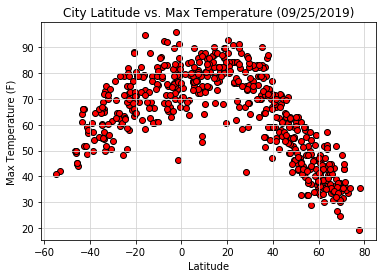

In [15]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="red")
plt.title("City Latitude vs. Max Temperature (09/25/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


# Save the figure
plt.savefig("../Images/Lat_vs_MaxTemp(fig1).png")

# Show plot
plt.show()



#### Latitude vs. Humidity Plot

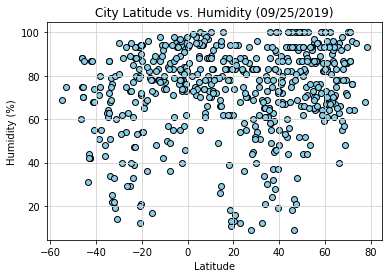

In [17]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (09/25/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


# Save the figure
plt.savefig("../Images/Lat_vs_Humidity(fig2).png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

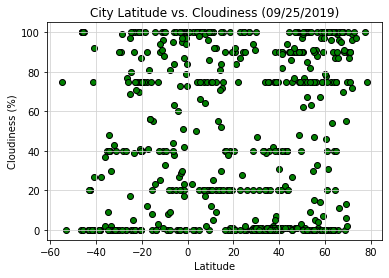

In [19]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="green")
plt.title("City Latitude vs. Cloudiness (09/25/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


# Save the figure
plt.savefig("../Images/Lat_vs_Cloudiness(fig3).png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

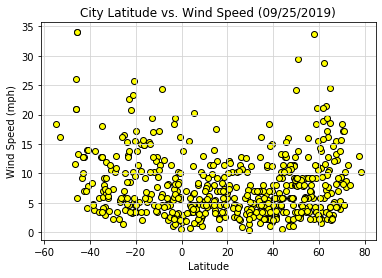

In [20]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="yellow")
plt.title("City Latitude vs. Wind Speed (09/25/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


# Save the figure
plt.savefig("../Images/Lat_vs_WindSpeed(fig4).png")

# Show plot
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [21]:
# Create Northern and Southern Hemisphere DataFrames
north = weather_df[weather_df['Lat'] >= 0]
south = weather_df[weather_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is -0.8476796247705032
The regression expression is:  Y = -0.7477130736673789*x + 90.94973063956309


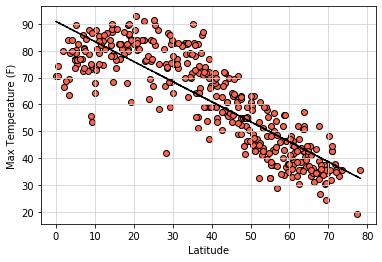

In [36]:
# Defining the variables
lat_n = north["Lat"]
max_temp_n = north["Max Temp"]

# creating the chart
slope, intercept, r_value, p_value, std_err = linregress(lat_n, max_temp_n)
regression = slope * lat_n + intercept
plt.scatter(lat_n, max_temp_n ,edgecolors="black",facecolors="tomato")
plt.plot(lat_n,regression,"--", color = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("../Images/Regression(north)_Lat_vs_MaxTemp(fig5).png")

# Show plot
print(f"The r-squared is {r_value}")
print(f"The regression expression is:  Y = {slope}*x + {intercept}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.6774205613658387
The regression expression is:  Y = 0.5606162180809763*x + 80.53043551734096


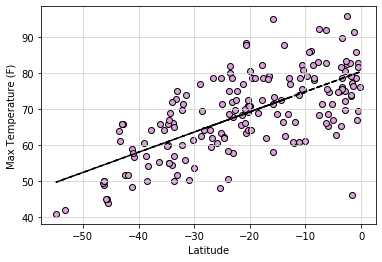

In [26]:
# Defining the variables
lat_s = south["Lat"]
max_temp_s = south["Max Temp"]

# creating the chart
slope, intercept, r_value, p_value, std_err = linregress(lat_s, max_temp_s)
regression = slope * lat_s + intercept
plt.scatter(lat_s, max_temp_s ,edgecolors="black",facecolors="plum")
plt.plot(lat_s,regression,"--", color = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("../Images/Regression(south)_Lat_vs_MaxTemp(fig6).png")

# Show plot
print(f"The r-squared is {r_value}")
print(f"The regression expression is:  Y = {slope}*x + {intercept}")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.08983349673355404
The regression expression is:  Y = 0.08953822015451073*x + 71.32506017221225


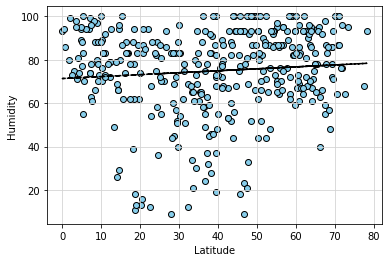

In [28]:
# Defining the variables
lat_n = north["Lat"]
humid_n = north["Humidity"]

# creating the chart
slope, intercept, r_value, p_value, std_err = linregress(lat_n, humid_n)
regression = slope * lat_n + intercept
plt.scatter(lat_n, humid_n ,edgecolors="black",facecolors="skyblue")
plt.plot(lat_n,regression,"--", color = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("../Images/Regression(north)_Lat_vs_Humidity(fig7).png")

# Show plot
print(f"The r-squared is {r_value}")
print(f"The regression expression is:  Y = {slope}*x + {intercept}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.2872552746049137
The regression expression is:  Y = 0.4315649034842034*x + 79.05513111497822


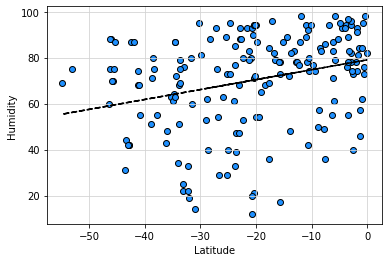

In [30]:
# Defining the variables
lat_s = south["Lat"]
humid_s = south["Humidity"]

# creating the chart
slope, intercept, r_value, p_value, std_err = linregress(lat_s, humid_s)
regression = slope * lat_s + intercept
plt.scatter(lat_s, humid_s ,edgecolors="black",facecolors="dodgerblue")
plt.plot(lat_s,regression,"--", color = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("../Images/Regression(south)_Lat_vs_Humidity(fig8).png")

# Show plot
print(f"The r-squared is {r_value}")
print(f"The regression expression is:  Y = {slope}*x + {intercept}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.12488846785659238
The regression expression is:  Y = 0.25309408836509645*x + 41.03579213446081


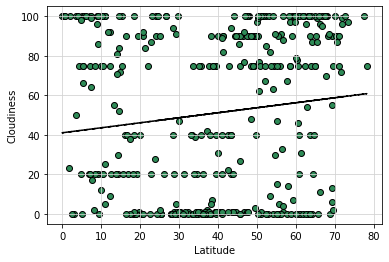

In [31]:
# Defining the variables
lat_n = north["Lat"]
cloud_n = north["Cloudiness"]

# creating the chart
slope, intercept, r_value, p_value, std_err = linregress(lat_n, cloud_n)
regression = slope * lat_n + intercept
plt.scatter(lat_n, cloud_n ,edgecolors="black",facecolors="seagreen")
plt.plot(lat_n,regression,"--", color = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("../Images/Regression(north)_Lat_vs_Cloudiness(fig9).png")

# Show plot
print(f"The r-squared is {r_value}")
print(f"The regression expression is:  Y = {slope}*x + {intercept}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.2180819545942463
The regression expression is:  Y = 0.6100031083409956*x + 58.05216407009485


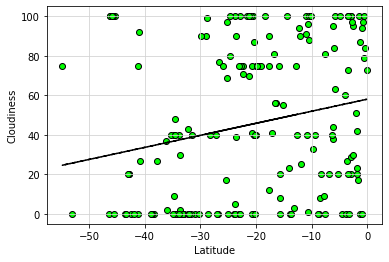

In [33]:
# Defining the variables
lat_s = south["Lat"]
cloud_s = south["Cloudiness"]

# creating the chart
slope, intercept, r_value, p_value, std_err = linregress(lat_s, cloud_s)
regression = slope * lat_s + intercept
plt.scatter(lat_s, cloud_s ,edgecolors="black",facecolors="lime")
plt.plot(lat_s,regression,"--", color = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("../Images/Regression(south)_Lat_vs_Cloudiness(fig10).png")

# Show plot
print(f"The r-squared is {r_value}")
print(f"The regression expression is:  Y = {slope}*x + {intercept}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.24321337634649698
The regression expression is:  Y = 0.05991493500143985*x + 4.915239618471768


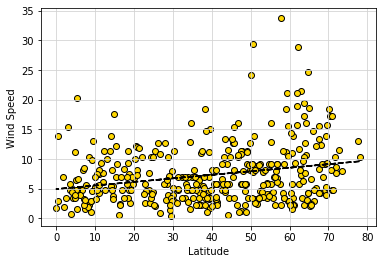

In [34]:
# Defining the variables
lat_n = north["Lat"]
wind_n = north["Wind Speed"]

# creating the chart
slope, intercept, r_value, p_value, std_err = linregress(lat_n, wind_n)
regression = slope * lat_n + intercept
plt.scatter(lat_n, wind_n ,edgecolors="black",facecolors="gold")
plt.plot(lat_n,regression,"--", color = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")

# Save the figure
plt.savefig("../Images/Regression(north)_Lat_vs_Wind_Speed(fig11).png")

# Show plot
print(f"The r-squared is {r_value}")
print(f"The regression expression is:  Y = {slope}*x + {intercept}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is -0.28905573583519123
The regression expression is:  Y = -0.12578141268525056*x + 6.344058254504985


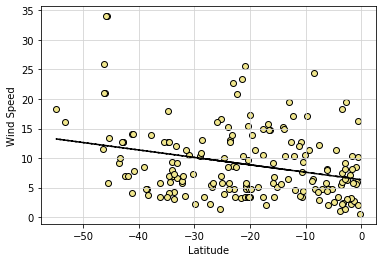

In [35]:
# Defining the variables
lat_s = south["Lat"]
wind_s = south["Wind Speed"]

# creating the chart
slope, intercept, r_value, p_value, std_err = linregress(lat_s, wind_s)
regression = slope * lat_s + intercept
plt.scatter(lat_s, wind_s ,edgecolors="black",facecolors="khaki")
plt.plot(lat_s,regression,"--", color = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("../Images/Regression(south)_Lat_vs_Wind_Speed(fig12).png")

# Show plot
print(f"The r-squared is {r_value}")
print(f"The regression expression is:  Y = {slope}*x + {intercept}")
plt.show()